In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
from folium.features import ColorLine
from folium.plugins import ScrollZoomToggler


In [3]:
cities=["Dublin","London","Berlin","Amsterdam","Copenhagen","Barcelona","Hamburg","Milano","Luxembourg","Brussels","Paris","Stockholm","Oslo","Munich","Zurich","Istanbul"]

avg_rent=[2876,3295,2340,2769,2215,1433,2074,1910,1587,1120,3294,1564,1390,2290,3186,1053]

avg_depo=[3217,3755,2675,4376,6051,1430,2383,2074,2606,2237,4291,1590,3690,2570,4407,1217]

liv_cost=[1016,1130,981,930,1044,764,973,965,944,912,1025,915,1041,1027,1686,515]

average_salary=[5916,6431,6000,6520,9943,3583,5416,2916,5604,5123,4500,7243,5102,6041,11125,1914]

job_opp=[1237,4698,1758,747,336,1118,558,2340,542,2214,2206,737,212,1632,2476,306]


european_rents_by_city = pd.DataFrame({'City': cities,
                                       'Average Rent': avg_rent,
                                       'Average Deposit': avg_depo,
                                       )


In [2]:
cities=["Dublin","London","Berlin","Amsterdam","Copenhagen","Barcelona","Hamburg","Milano","Luxembourg","Brussels","Paris","Stockholm","Oslo","Munich","Zurich","Istanbul"]

avg_rent=[2876,3295,2340,2769,2215,1433,2074,1910,1587,1120,3294,1564,1390,2290,3186,1053]

avg_depo=[3217,3755,2675,4376,6051,1430,2383,2074,2606,2237,4291,1590,3690,2570,4407,1217]

liv_cost=[1016,1130,981,930,1044,764,973,965,944,912,1025,915,1041,1027,1686,515]

average_salary=[5916,6431,6000,6520,9943,3583,5416,2916,5604,5123,4500,7243,5102,6041,11125,1914]

job_opp=[1237,4698,1758,747,336,1118,558,2340,542,2214,2206,737,212,1632,2476,306]


big_table = pd.DataFrame({'City': cities,
                                       'Average Rent': avg_rent,
                                       'Average Deposit': avg_depo,
                                        "Living Costs" : liv_cost,
                                         "Average Salary": average_salary,
                                          "Open Jobs" : job_opp
                         })


In [15]:

def color_negative_red(val):
    if isinstance(val, str):
        return 'background-color: lightblue; font-weight: bold'
    color = 'red' if val < 0 else 'black'
    return 'color: %s; font-weight: bold' % color

big_table.style.format(
    {
        'Average Rent':'£{:,.0f}',
        'Average Deposit':'£{:,.0f}',
        'Living Costs':'£{:,.0f}',
        'Average Salary':'£{:,.0f}'
    }
).background_gradient(cmap=sns.light_palette("blue", as_cmap=True)).applymap(color_negative_red)




,City,Average Rent,Average Deposit,Living Costs,Average Salary,Open Jobs
0,Dublin,"£2,876","£3,217","£1,016","£5,916",1237
1,London,"£3,295","£3,755","£1,130","£6,431",4698
2,Berlin,"£2,340","£2,675",£981,"£6,000",1758
3,Amsterdam,"£2,769","£4,376",£930,"£6,520",747
4,Copenhagen,"£2,215","£6,051","£1,044","£9,943",336
5,Barcelona,"£1,433","£1,430",£764,"£3,583",1118
6,Hamburg,"£2,074","£2,383",£973,"£5,416",558
7,Milano,"£1,910","£2,074",£965,"£2,916",2340
8,Luxembourg,"£1,587","£2,606",£944,"£5,604",542
9,Brussels,"£1,120","£2,237",£912,"£5,123",2214


In [7]:
big_table.style.format(
    {
        'Average Rent':'£{:,.0f}',
        'Average Deposit':'£{:,.0f}',
        'Living Costs':'£{:,.0f}',
        'Average Salary':'£{:,.0f}'
    }
)

,City,Average Rent,Average Deposit,Living Costs,Average Salary,Open Jobs
0,Dublin,"£2,876","£3,217","£1,016","£5,916",1237
1,London,"£3,295","£3,755","£1,130","£6,431",4698
2,Berlin,"£2,340","£2,675",£981,"£6,000",1758
3,Amsterdam,"£2,769","£4,376",£930,"£6,520",747
4,Copenhagen,"£2,215","£6,051","£1,044","£9,943",336
5,Barcelona,"£1,433","£1,430",£764,"£3,583",1118
6,Hamburg,"£2,074","£2,383",£973,"£5,416",558
7,Milano,"£1,910","£2,074",£965,"£2,916",2340
8,Luxembourg,"£1,587","£2,606",£944,"£5,604",542
9,Brussels,"£1,120","£2,237",£912,"£5,123",2214


In [3]:
big_table

,City,Average Rent,Average Deposit,Living Costs,Average Salary,Open Jobs
0,Dublin,2876,3217,1016,5916,1237
1,London,3295,3755,1130,6431,4698
2,Berlin,2340,2675,981,6000,1758
3,Amsterdam,2769,4376,930,6520,747
4,Copenhagen,2215,6051,1044,9943,336
5,Barcelona,1433,1430,764,3583,1118
6,Hamburg,2074,2383,973,5416,558
7,Milano,1910,2074,965,2916,2340
8,Luxembourg,1587,2606,944,5604,542
9,Brussels,1120,2237,912,5123,2214


In [4]:
european_rents_by_city

,City,Average Rent,Average Deposit
0,Dublin,2876,3217
1,London,3295,3755
2,Berlin,2340,2675
3,Amsterdam,2769,4376
4,Copenhagen,2215,6051
5,Barcelona,1433,1430
6,Hamburg,2074,2383
7,Milano,1910,2074
8,Luxembourg,1587,2606
9,Brussels,1120,2237


In [7]:
### Create a geocoder object ###
geolocator = Nominatim(user_agent="Chrome/112.0.5615.138")

### Define a function to get the coordinates for a given city name ###
def get_coords(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None

### Add the latitude and longitude columns to the rental data ###
european_rents_by_city['Latitude'] = european_rents_by_city['City'].apply(get_coords).apply(lambda x: x[0] if x else None)
european_rents_by_city['Longitude'] = european_rents_by_city['City'].apply(get_coords).apply(lambda x: x[1] if x else None)

### Save the updated rental data to a new CSV file ###
european_rents_by_city.to_csv('rental_data_with_coords.csv', index=False)

In [5]:
european_rents_by_city=pd.read_csv('rental_data_with_coords.csv')

In [6]:
european_rents_by_city

,City,Average Rent,Average Deposit,Latitude,Longitude
0,Dublin,2876,3217,53.349801,-6.260296
1,London,3295,3755,51.507336,-0.127650
2,Berlin,2340,2675,52.517037,13.388860
3,Amsterdam,2769,4376,52.373080,4.892453
4,Copenhagen,2215,6051,55.686724,12.570072
5,Barcelona,1433,1430,41.382894,2.177432
6,Hamburg,2074,2383,53.550341,10.000654
7,Milano,1910,2074,45.464194,9.189635
8,Luxembourg,1587,2606,49.815868,6.129675
9,Brussels,1120,2237,50.846557,4.351697


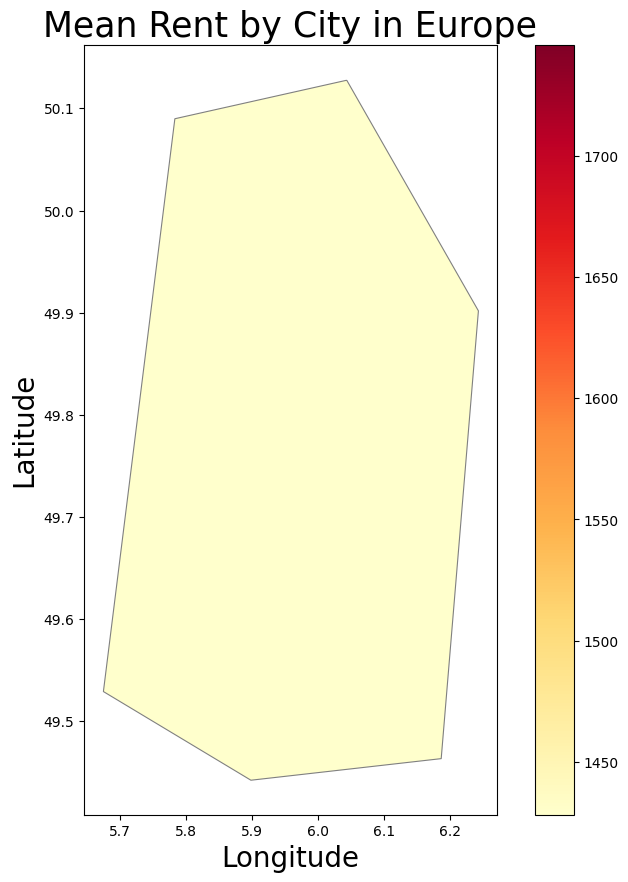

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### Load a shapefile of the European countries ###
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



### Merge the rental data with the shapefile based on the city name ###
merged = world.merge(european_rents_by_city, left_on='name', right_on='City')

### Aggregate the rental data by city to get the mean rent for each city ###
city_means = european_rents_by_city.groupby('City').mean()['Average Rent']

### Add the mean rent for each city as a new column in the merged dataframe ###
merged['Average Rent'] = merged['City'].map(city_means)

### Create a map of the European countries ###
europe = merged.query('continent == "Europe"')
fig, ax = plt.subplots(figsize=(10,10))

### Plot the mean rent for each city as a colormap on the map ###
europe.plot(column='Average Rent', cmap='YlOrRd', linewidth=0.8, edgecolor='gray', ax=ax, legend=True)

###Set the title and axis labels ###
ax.set_title('Mean Rent by City in Europe', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_xlabel('Longitude', fontdict={'fontsize': '20'})
ax.set_ylabel('Latitude', fontdict={'fontsize': '20'})

### Show the map ###
plt.show();


In [7]:
import folium


### Create a map centered on Europe ###
map = folium.Map(location=[50, 10], zoom_start=4)

### Add a marker for each city with a popup showing the average rent ###
for _, row in european_rents_by_city.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        popup_text = f"{row['City']}<br>Avg Rent: {row['Average Rent']:.2f}€"
        marker = folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_text)
        marker.add_to(map)

### Display the map ###
map


In [71]:

###Define a function to assign color based on average rent value###
def get_color(avg_rent):
    if avg_rent < 1800:
        return 'blue'
    elif avg_rent < 2500:
        return 'green'
    else:
        return 'red'

###Create a map centered on Europe###
map = folium.Map(location=[50, 10], zoom_start=4)

###Add a marker for each city with a popup showing the average rent###
for _, row in european_rents_by_city.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        popup_text = f"{row['City']}<br>Avg Rent: {row['Average Rent']:.2f}€"
        marker = folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_text, 
                               icon=folium.Icon(color=get_color(row['Average Rent'])))
        marker.add_to(map)

### Add a legend's to the map ###
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 5px; width: 250px; height: 250px; 
     border:2px solid black; z-index:9999; font-size:14px;
     background-color: white;
     ">
     <h3 style="margin:2px; font-weight: bold; color: midnightblue;">Cost of Rent in Europe</h3>
    <p style="margin:10px; font-weight: bold;"><span style='color: deepskyblue;'>&#9679;</span> Avg Rent &lt; 1800€ <span style='color: deepskyblue;'>[Oslo, Stockholm, Istanbul, Barcelona, Brussels, Luxembourg]</span></p>
     <p style="margin:10px; font-weight: bold;"><span style='color: green;'>&#9679;</span> 1800€ &le; Avg Rent &lt; 2800€ <span style='color: green;'>[Copenhagen, Hamburg, Milano, Munich, Berlin]</span></p>
     <p style="margin:10px; font-weight: bold;"><span style='color: red;'>&#9679;</span> Avg Rent &ge; 2800€ <span style='color: red;'>[London, Dublin, Paris, Amsterdam, Zurich]</span></p>
   </div>
'''
map.get_root().html.add_child(folium.Element(legend_html))

### Add a scroll zoom toggler to the map ###
ScrollZoomToggler().add_to(map)

### Display the map ###
map
